In [31]:
#import important libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [32]:
#upload files to colab
from google.colab import files
uploaded = files.upload()

Saving electric_vehicles_spec_2025.csv.csv to electric_vehicles_spec_2025.csv (1).csv


In [33]:
df = pd.read_csv('electric_vehicles_spec_2025.csv.csv')
df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


In [34]:
#dropping unneccasary columns
df = df.drop(['model','battery_type','source_url','fast_charge_port'], axis=1)
df.head()

,brand,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type
0,Abarth,155,37.8,192.0,235.0,156,225,7.0,67.0,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback
1,Abarth,155,37.8,192.0,235.0,149,225,7.0,67.0,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback
2,Abarth,200,50.8,102.0,345.0,158,280,5.9,79.0,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV
3,Abarth,200,50.8,102.0,345.0,158,280,6.2,79.0,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV
4,Aiways,150,60.0,NaN,310.0,156,315,7.5,78.0,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV


<Axes: >

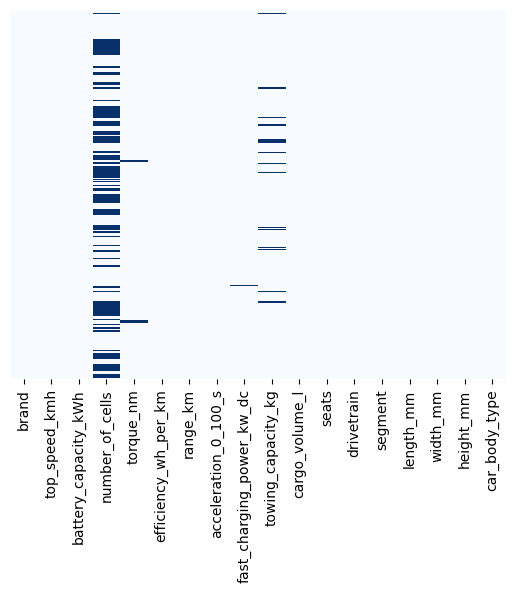

In [35]:
#searching for empty cells
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [36]:
df.isnull().sum()

,0
brand,0
top_speed_kmh,0
battery_capacity_kWh,0
number_of_cells,202
torque_nm,7
efficiency_wh_per_km,0
range_km,0
acceleration_0_100_s,0
fast_charging_power_kw_dc,1
towing_capacity_kg,26


In [37]:
#filling cells with NaN
df = df.fillna(method='ffill')

/tmp/ipython-input-636341629.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [38]:
#information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   top_speed_kmh              478 non-null    int64  
 2   battery_capacity_kWh       478 non-null    float64
 3   number_of_cells            478 non-null    float64
 4   torque_nm                  478 non-null    float64
 5   efficiency_wh_per_km       478 non-null    int64  
 6   range_km                   478 non-null    int64  
 7   acceleration_0_100_s       478 non-null    float64
 8   fast_charging_power_kw_dc  478 non-null    float64
 9   towing_capacity_kg         478 non-null    float64
 10  cargo_volume_l             478 non-null    object 
 11  seats                      478 non-null    int64  
 12  drivetrain                 478 non-null    object 
 13  segment                    478 non-null    object 

<Axes: >

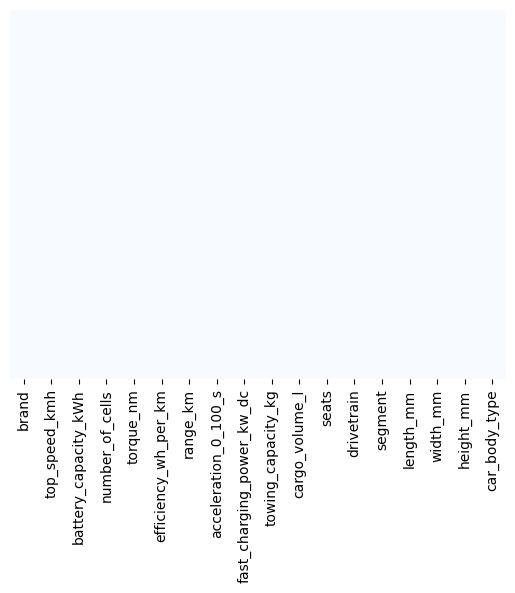

In [39]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [40]:
#encoding str options to numbers
encoder = LabelEncoder()
df['drivetrain'] = encoder.fit_transform(df['drivetrain'])
df['segment'] = encoder.fit_transform(df['segment'])
df['car_body_type'] = encoder.fit_transform(df['car_body_type'])
df['brand'] = encoder.fit_transform(df['brand'])

In [41]:
#convert certain cell to str
df['cargo_volume_l'] = df['cargo_volume_l'].replace('10 Banana Boxes', '511')
df['cargo_volume_l'] = df['cargo_volume_l'].replace('13 Banana Boxes', '645')
df['cargo_volume_l'] = df['cargo_volume_l'].replace('31 Banana Boxes', '500')
df['cargo_volume_l'] = df['cargo_volume_l'].astype(int)

In [42]:
df.head()

,brand,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type
0,0,155,37.8,192.0,235.0,156,225,7.0,67.0,0.0,185,4,1,1,3673,1683,1518,2
1,0,155,37.8,192.0,235.0,149,225,7.0,67.0,0.0,185,4,1,1,3673,1683,1518,2
2,0,200,50.8,102.0,345.0,158,280,5.9,79.0,0.0,360,5,1,9,4187,1779,1557,4
3,0,200,50.8,102.0,345.0,158,280,6.2,79.0,0.0,360,5,1,9,4187,1779,1557,4
4,1,150,60.0,102.0,310.0,156,315,7.5,78.0,0.0,496,5,1,10,4680,1865,1700,4


In [43]:
#convesrt to numpy array
X = df.values

In [44]:
#scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
#applying PCA
pca=PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.34853008 0.2438331  0.06982848]


In [46]:
#create a PCA dataframe
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
print(pca_df.head())

        PC1       PC2       PC3
0 -4.916625 -2.941357 -1.810544
1 -4.955544 -2.999329 -1.757163
2 -2.382667 -1.046667 -1.297632
3 -2.414579 -1.018138 -1.289982
4 -1.965427  0.635741 -0.934284


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

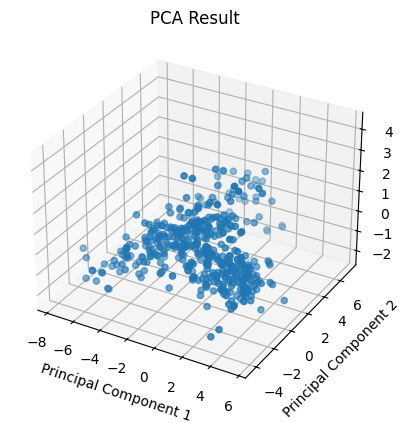

In [50]:
#visualise the final result
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA Result')
plt.savefig('PCA_Python.pdf')
files.download('PCA_Python.pdf')

plt.show()